# Visualizing the OLS cost function, L1, L2 constraints

Starter code for the Q3

#### Libraries

In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

%matplotlib inline
plt.style.use('seaborn-white')

#### Creating the data set

In [42]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)

#Subtracting the mean so that the y's are centered
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T

#Nornalizing the design matrix to facilitate visualization
X = X / np.linalg.norm(X,axis = 0)

#### Helper functions

In [43]:
def costfunction(X,y,theta):
    m = np.size(y)
    h=np.dot(X,theta)
    J = float((1./(2*m)) * np.dot((h - y).T ,(h - y)));    
    return J;


def closed_form_solution(X,y):
    return np.linalg.inv(np.dot(np.dot(np.dot(X.t,X),X.T),y))
    
def closed_form_reg_solution(X,y,lamda = 10): 
    m,n = X.shape
    I = np.eye((n))
    return (np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)+lamda*I),X.T),y))[:,0]

def cost_l2(x,y):
    return x**2 + y**2

def cost_l1(x,y):
    return np.abs(x) + np.abs(y)

#### HINT: Write the closed form function for OLS, Ridge and coordinate descent function for Lasso 
#### Each function must depend on the variable lambda


#### Computing the Ridge regularization solutions as a function of $\lambda$

In [44]:
''' Complete the cell '''
#### HINT: For the lambda range given below, call the ridge regression function
#### and store optimal w for each lambda

lambda_range = np.logspace(0,4,num = 100)/1000
theta_0_list_reg_l2 = []
theta_1_list_reg_l2 = []

for l in lambda_range:
    t0, t1 = closed_form_reg_solution(X,y_noise,l)
    theta_0_list_reg_l2.append(t0)
    theta_1_list_reg_l2.append(t1)


#### Computing the Lasso regularization solutions as a function of $\lambda$

In [45]:
''' Complete the cell '''
#### HINT: For the lambda range given below, call the lasso function
#### and store optimal w for each lambda. [You can alternatively use
#### SKLearn for this excercise to compute Lasso]

lambda_range = np.logspace(0,2,num = 100)/1000
theta_0_list_reg_l1 = []
theta_1_list_reg_l1 = []

for l in lambda_range:
    model_sk_reg = linear_model.Lasso(alpha=l, fit_intercept=False)
    model_sk_reg.fit(X,y_noise)
    t0, t1 = model_sk_reg.coef_
    theta_0_list_reg_l1.append(t0)
    theta_1_list_reg_l1.append(t1)

#### Plotting the results

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'label'
/usr/lib/python3/dist-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'label'
/usr/lib/python3/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'label'
/usr/lib/python3/dist-packages/ipykernel_launcher.py:51: UserWarning: The following kwargs were not used by contour: 'label'


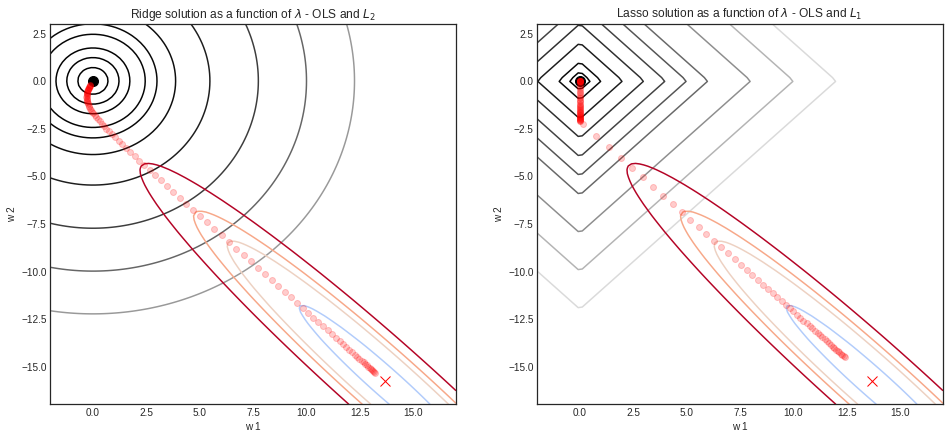

In [48]:
''' Complete the cell '''

#Setup of meshgrid of w values
xx, yy = np.meshgrid(np.linspace(-2,17,100),np.linspace(-17,3,100))

#Computing the cost function for each w combination
zz_l2 = np.array(  [cost_l2(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L2 function

zz_l1 = np.array(  [cost_l1(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L1 function

zz_ls = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values    
Z_l2 = zz_l2.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
Z_l1 = zz_l1.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.linalg.inv(X.T @ X) @X.T @ y_noise
min_l2 = np.array([0.,0.])
min_l1 = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)
ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250],  cmap = 'gist_gray', label = 'l2')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('w 1')
ax.set_ylabel('w 2')
ax.set_title('Ridge solution as a function of $\\lambda$ - OLS and $L_2$ ')

#Plotting the minimum - L2 
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

###############################################
''' FILL THIS CODE '''
#Plotting the path of L2 regularized minimum
#### HINT: plot w_0 & w_1 list corresponding to each value of lambda
## Your code below ##

ax.plot(theta_0_list_reg_l2,theta_1_list_reg_l2, linestyle = 'none', marker = 'o', color = 'red', alpha = .2)

###############################################


#Plotting the contours - L1 
ax = fig.add_subplot(1, 2, 2)
ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray', label = 'l_1')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('w 1')
ax.set_ylabel('w 2')
ax.set_title('Lasso solution as a function of $\\lambda$ - OLS and $L_1$ ')

#Plotting the minimum - L1
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

###############################################
''' FILL THIS CODE '''
#Plotting the path of L1 regularized minimum
#### HINT: plot w_0 & w_1 list corresponding to each value of lambda
## Your code below ##

ax.plot(theta_0_list_reg_l1,theta_1_list_reg_l1, linestyle = 'none', marker = 'o', color = 'red', alpha = .2)


###############################################


plt.show()


In [49]:
print("3.2>   TRUE")

3.2>   TRUE
